In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

In [2]:
df_train= pd.read_csv("train_data.csv")
df_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

# visualisations

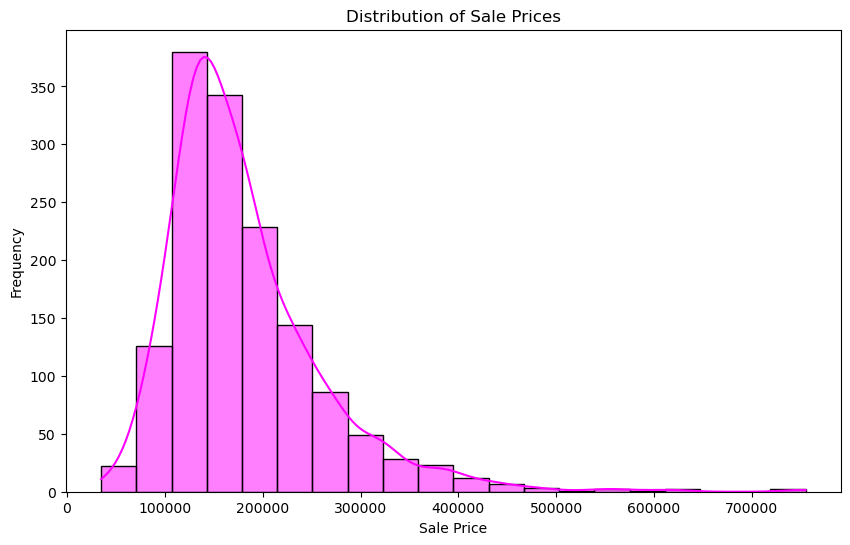

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['SalePrice'], kde=True, bins=20, color='magenta')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

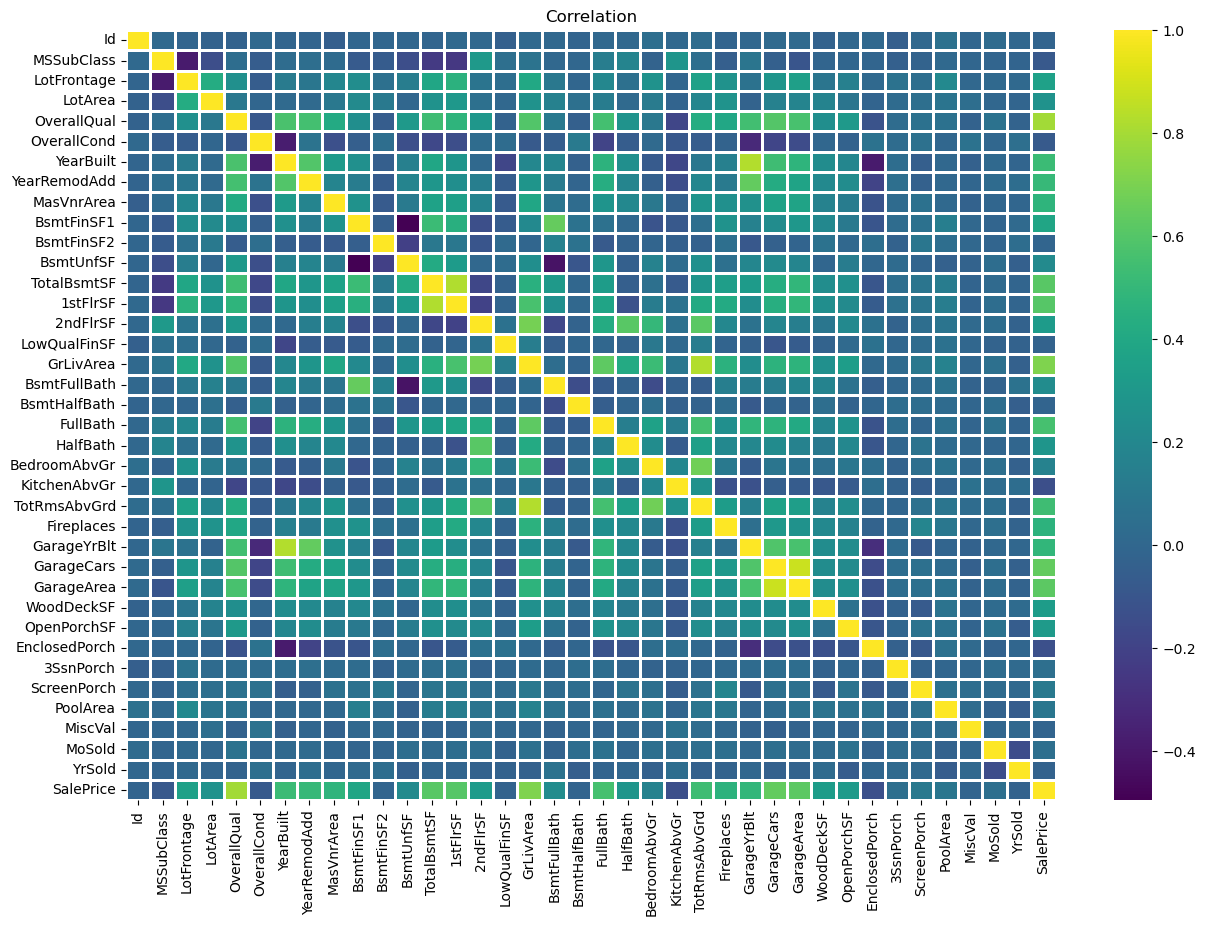

In [7]:
corr_matrix = df_train.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap="viridis", annot=False, linewidths=.9)
plt.title('Correlation')
plt.show()

# data preprocessing

In [8]:
missing_values = df_train.isnull().sum()
percent_missing_values = (missing_values/missing_values.sum())
for i in range(len(missing_values)):
    print(df_train.columns[i] ," - " ,percent_missing_values[i])

Id  -  0.0
MSSubClass  -  0.0
MSZoning  -  0.0
LotFrontage  -  0.03308213054029889
LotArea  -  0.0
Street  -  0.0
Alley  -  0.1748626899987227
LotShape  -  0.0
LandContour  -  0.0
Utilities  -  0.0
LotConfig  -  0.0
LandSlope  -  0.0
Neighborhood  -  0.0
Condition1  -  0.0
Condition2  -  0.0
BldgType  -  0.0
HouseStyle  -  0.0
OverallQual  -  0.0
OverallCond  -  0.0
YearBuilt  -  0.0
YearRemodAdd  -  0.0
RoofStyle  -  0.0
RoofMatl  -  0.0
Exterior1st  -  0.0
Exterior2nd  -  0.0
MasVnrType  -  0.1113807638267978
MasVnrArea  -  0.0010218418699706221
ExterQual  -  0.0
ExterCond  -  0.0
Foundation  -  0.0
BsmtQual  -  0.004726018648614127
BsmtCond  -  0.004726018648614127
BsmtExposure  -  0.004853748882360454
BsmtFinType1  -  0.004726018648614127
BsmtFinSF1  -  0.0
BsmtFinType2  -  0.004853748882360454
BsmtFinSF2  -  0.0
BsmtUnfSF  -  0.0
TotalBsmtSF  -  0.0
Heating  -  0.0
HeatingQC  -  0.0
CentralAir  -  0.0
Electrical  -  0.00012773023374632777
1stFlrSF  -  0.0
2ndFlrSF  -  0.0
LowQualF

In [9]:
columns_to_drop = df_train.columns[percent_missing_values > 0.02]
df_train_miss = df_train.drop(columns=columns_to_drop)

In [10]:
z_scores = (df_train_miss.select_dtypes(include=['int64', 'float64']) - df_train_miss.select_dtypes(include=['int64', 'float64']).mean()) / df_train_miss.select_dtypes(include=['int64', 'float64']).std()

print(z_scores)

            Id  MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
0    -1.730272    0.073350 -0.207071     0.651256    -0.517023   1.050634   
1    -1.727900   -0.872264 -0.091855    -0.071812     2.178881   0.156680   
2    -1.725528    0.073350  0.073455     0.651256    -0.517023   0.984415   
3    -1.723156    0.309753 -0.096864     0.651256    -0.517023  -1.862993   
4    -1.720785    0.073350  0.375020     1.374324    -0.517023   0.951306   
...        ...         ...       ...          ...          ...        ...   
1455  1.720785    0.073350 -0.260471    -0.071812    -0.517023   0.918196   
1456  1.723156   -0.872264  0.266316    -0.071812     0.381612   0.222899   
1457  1.725528    0.309753 -0.147760     0.651256     3.077516  -1.002149   
1458  1.727900   -0.872264 -0.080133    -0.794879     0.381612  -0.704164   
1459  1.730272   -0.872264 -0.058092    -0.794879     0.381612  -0.207523   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \


In [11]:
threshold = 3

outliers = (np.abs(z_scores) > threshold)
for column in outliers.columns:
    print("Column:", column)
    print("Positions:", outliers.index[outliers[column]].tolist())
    print()

Column: Id
Positions: []

Column: MSSubClass
Positions: [9, 48, 93, 125, 165, 246, 291, 300, 312, 335, 411, 488, 520, 535, 635, 637, 703, 705, 713, 861, 969, 985, 1030, 1062, 1144, 1186, 1190, 1266, 1393, 1416]

Column: LotArea
Positions: [53, 249, 313, 335, 384, 451, 457, 661, 706, 769, 848, 1298, 1396]

Column: OverallQual
Positions: [375, 533]

Column: OverallCond
Positions: [88, 185, 191, 218, 241, 250, 304, 375, 378, 398, 461, 508, 519, 583, 676, 703, 726, 745, 980, 991, 1123, 1149, 1213, 1268, 1327, 1352, 1435, 1457]

Column: YearBuilt
Positions: [304, 630, 747, 1132, 1137, 1349]

Column: YearRemodAdd
Positions: []

Column: MasVnrArea
Positions: [37, 58, 70, 105, 115, 161, 169, 178, 224, 297, 349, 403, 477, 517, 523, 654, 691, 718, 755, 763, 798, 808, 825, 898, 981, 1111, 1169, 1228, 1289, 1298, 1373, 1417]

Column: BsmtFinSF1
Positions: [70, 178, 523, 898, 1182, 1298]

Column: BsmtFinSF2
Positions: [24, 52, 113, 116, 153, 166, 233, 253, 260, 263, 271, 273, 313, 322, 355, 414, 44

In [12]:
train_data = df_train_miss[~outliers.any(axis=1)]

In [13]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'

# fitting regression model

In [14]:
y = train_data['SalePrice']
X = train_data[['LotArea','BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=42)

In [16]:
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                                        ('scaler', StandardScaler())])

In [17]:
model = LinearRegression()

ensemble_pipeline = Pipeline(steps=[('preprocessor', numerical_transformer),
                                    ('model', model)])
 
ensemble_pipeline.fit(X_train, y_train)
y_predicted = ensemble_pipeline.predict(X_test)

In [18]:
pd.DataFrame({'y_test_pred' : y_predicted, 'y_test_real' : y_test})

,y_test_pred,y_test_real
758,182652.604677,179400
514,115457.290519,96500
640,147173.654303,274000
45,209150.733476,319900
882,209060.346778,178000
...,...,...
781,200146.477333,175900
1294,138774.331962,115000
761,102235.469670,100000
427,108564.840866,109008


In [19]:
r2 = r2_score(y_test,y_predicted)
r2

0.5289798084852881

# predicting prices

In [20]:
df_test = pd.read_csv("test_data.csv")
df_test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [21]:
X_pred = df_test[['LotArea','BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr']]
hpp = ensemble_pipeline.predict(X_pred)

predictions_df = pd.DataFrame({
    'Id': df_test['Id'],
    'SalePrice': hpp
})

In [22]:
predictions_df.to_csv("predicted_prices.csv", index=False)